In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from utils import *

单个seed消融实验画图

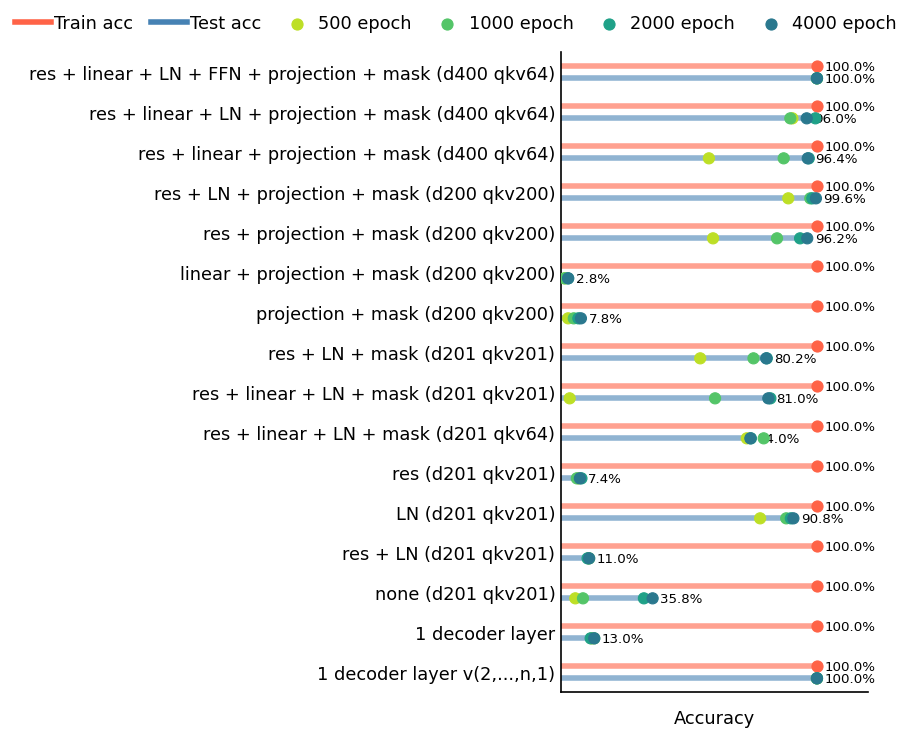

In [3]:
seed = 5
named_working_dir_list = [
    [f'3x_to_x-seed_{seed}-N_1000-全加', 'res + linear + LN + FFN + projection + mask (d400 qkv64)'],
    [f'3x_to_x-seed_{seed}-N_1000-加MLP_残差_layernorm', 'res + linear + LN + projection + mask (d400 qkv64)'],
    [f'3x_to_x-seed_{seed}-N_1000-加上MLP和残差', 'res + linear + projection + mask (d400 qkv64)'],
    [f'3x_to_x-seed_{seed}-N_1000-res1_layernorm', 'res + LN + projection + mask (d200 qkv200)'],
    [f'3x_to_x-seed_{seed}-N_1000-不加MLP只加残差', 'res + projection + mask (d200 qkv200)'],
    [f'3x_to_x-seed_{seed}-N_1000-加上MLP', 'linear + projection + mask (d200 qkv200)'],
    [f'3x_to_x-seed_{seed}-N_1000-最简单的结构', 'projection + mask (d200 qkv200)'],
    [f'3x_to_x-seed_{seed}-N_1000-res1_layernorm_noprojection_dm201_qkv201', 'res + LN + mask (d201 qkv201)'],
    [f'3x_to_x-seed_{seed}-N_1000-MLP_res1_layernorm_noprojection_dm201_qkv201', 'res + linear + LN + mask (d201 qkv201)'],
    [f'3x_to_x-seed_{seed}-N_1000-MLP_res1_layernorm_noprojection_dm201_qkv64', 'res + linear + LN + mask (d201 qkv64)'],
    [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection_加res', 'res (d201 qkv201)'],
    [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection_加layernorm', 'LN (d201 qkv201)'],
    [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection_加res_layernorm', 'res + LN (d201 qkv201)'],
    [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection', 'none (d201 qkv201)'],
    [f'3x_to_x-seed_{seed}-N_1000-1Decoder_全加', '1 decoder layer'],
    [f'3x_to_x-seed_{seed}-N_1000-1Decoder_V往后顺延一位_无mask', '1 decoder layer v(2,...,n,1)']
]

train_acc_list = []
test_acc_list = [] 

exp_num = len(named_working_dir_list)

fig = plt.figure(figsize=(12, 10))
format_settings(ms=10, fs=16, lw=5, top=0.9, bottom=0.1, left=0.6, right=0.92, major_tick_len=0)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
ax = plt.gca()

width = 0.3
color = ['tomato', 'steelblue']
color_list = get_color_list(n_colors=4, invert=True)
color_list = get_color_list(n_colors=4, invert=True, color_max=0.9, color_min=0.4)

for i, (working_dir, name) in enumerate(named_working_dir_list):
    train_acc_his = np.load(f'../result/GPT_lightly_2层_1head_3x_to_x/{working_dir}/loss/acc_train_unmask_his.npy')
    test_acc_his = np.load(f'../result/GPT_lightly_2层_1head_3x_to_x/{working_dir}/loss/acc_test_unmask_his.npy')
    
    tmp_test_list = [test_acc_his[5], test_acc_his[10], test_acc_his[20], test_acc_his[-1]]

    ax.plot([0, train_acc_his[-1]], [exp_num-1-i+width/2, exp_num-1-i+width/2], c=color[0], alpha=0.6)
    ax.plot([0, test_acc_his[-1]], [exp_num-1-i-width/2, exp_num-1-i-width/2], c=color[1], alpha=0.6)

    ax.scatter(train_acc_his[-1], exp_num-1-i+width/2, c=color[0])
    ax.scatter(tmp_test_list, [exp_num-1-i-width/2]*len(tmp_test_list), color=color_list, zorder=10)

    ax.text(train_acc_his[-1]+0.03, exp_num-1-i+width/2, f'{train_acc_his[-1]:.1%}', ha='left', va='center', fontsize=12)
    ax.text(test_acc_his[-1]+0.03, exp_num-1-i-width/2, f'{test_acc_his[-1]:.1%}', ha='left', va='center', fontsize=12)


# ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
# ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax.set_xticks([])
ax.set_xticklabels([])

ax.set_yticks(range(exp_num))
ax.set_yticklabels([name[1] for name in named_working_dir_list[::-1]])

plt.xlabel('Accuracy', labelpad=15)

# legend
ax.plot([], [], c = color[0], label = 'Train acc')
ax.plot([], [], c = color[1], label = 'Test acc')
ax.scatter([], [], color=color_list[0], label='500 epoch')
ax.scatter([], [], color=color_list[1], label='1000 epoch')
ax.scatter([], [], color=color_list[2], label='2000 epoch')
ax.scatter([], [], color=color_list[3], label='4000 epoch')

plt.legend(ncol = 6, loc = (-1.8, 1.02), frameon = False, handletextpad = 0.2, columnspacing = 1)

ax.set_xlim(0, 1.2)
ax.set_ylim(-0.5, exp_num-0.5)
plt.savefig(f'../result/GPT_lightly_2层_1head_3x_to_x/compare_seed{seed}.png')

画在一起的消融实验

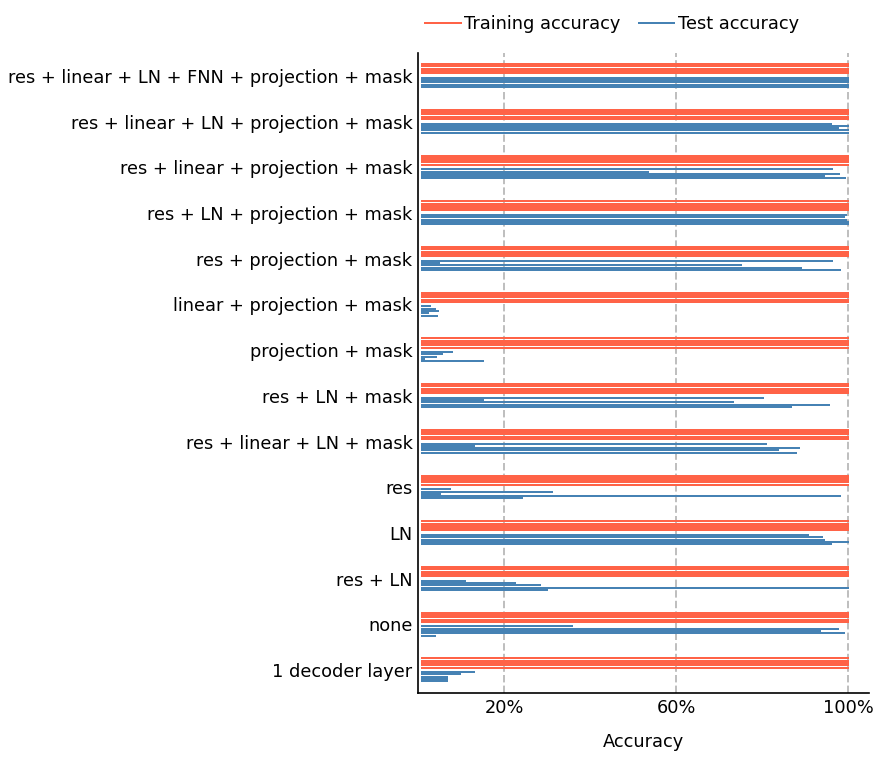

In [6]:
def get_working_dir_list(seed):
    named_working_dir_list = [
        [f'3x_to_x-seed_{seed}-N_1000-全加', 'res + linear + LN + FNN + projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-加MLP_残差_layernorm', 'res + linear + LN + projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-加上MLP和残差', 'res + linear + projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-res1_layernorm', 'res + LN + projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-不加MLP只加残差', 'res + projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-加上MLP', 'linear + projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-最简单的结构', 'projection + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-res1_layernorm_noprojection_dm201_qkv201', 'res + LN + mask'],
        [f'3x_to_x-seed_{seed}-N_1000-MLP_res1_layernorm_noprojection_dm201_qkv201', 'res + linear + LN + mask'],
        # [f'3x_to_x-seed_{seed}-N_1000-MLP_res1_layernorm_noprojection_dm201_qkv64', 'res + linear + LN + mask (d201 qkv64)'],
        [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection_加res', 'res'],
        [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection_加layernorm', 'LN'],
        [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection_加res_layernorm', 'res + LN'],
        [f'3x_to_x-seed_{seed}-N_1000-2Decoder_无mask_无projection', 'none'],
        [f'3x_to_x-seed_{seed}-N_1000-1Decoder_全加', '1 decoder layer'],
        # [f'3x_to_x-seed_{seed}-N_1000-1Decoder_V往后顺延一位_无mask', '1 decoder layer v(2,...,n,1)']
    ]
    return named_working_dir_list

train_acc_list = []
test_acc_list = [] 

exp_num = 14

fig = plt.figure(figsize=(12, 10))
format_settings(ms=2, fs=16, lw=1.8, top=0.9, bottom=0.1, left=0.45, right=0.92, major_tick_len=0)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
ax = plt.gca()

color = ['tomato', 'steelblue']
color_list = get_color_list(n_colors=4, invert=True, color_max=0.9, color_min=0.4)

# 竖线显示20% 60% 100%
ax.plot([0.2, 0.2], [-0.5, exp_num-0.5], c='gray', ls='--', alpha=0.5, zorder=1)
ax.plot([0.6, 0.6], [-0.5, exp_num-0.5], c='gray', ls='--', alpha=0.5, zorder=1)
ax.plot([1, 1], [-0.5, exp_num-0.5], c='gray', ls='--', alpha=0.5, zorder=1)



for j ,seed in enumerate([1,2,3,4,5]):
    named_working_dir_list = get_working_dir_list(seed)
    for i, (working_dir, name) in enumerate(named_working_dir_list):
        # train
        train_acc_his = np.load(f'../result/GPT_lightly_2层_1head_3x_to_x/{working_dir}/loss/acc_train_unmask_his.npy')
        ax.plot([0.01, train_acc_his[-1]], [exp_num-1-i+0.15+(0.05*j-0.1), exp_num-1-i+0.15+(0.05*j-0.1)], c=color[0], alpha=1, zorder=12)
        # ax.scatter(train_acc_his[-1], exp_num-1-i+0.2+(0.05*j-0.1), c=color[0])

        # test
        test_acc_his = np.load(f'../result/GPT_lightly_2层_1head_3x_to_x/{working_dir}/loss/acc_test_unmask_his.npy')
        ax.plot([0.01, test_acc_his[-1]], [exp_num-1-i-0.15+(0.05*j-0.1), exp_num-1-i-0.15+(0.05*j-0.1)], c=color[1], alpha=1, zorder=12)

        # tmp_test_list = [test_acc_his[5], test_acc_his[10], test_acc_his[20], test_acc_his[-1]]
        # ax.scatter(tmp_test_list, [exp_num-1-i-0.2+(0.05*j-0.1)]*len(tmp_test_list), color=color_list, zorder=10)



ax.set_xticks([0.2, 0.6, 1])
ax.set_xticklabels(['20%', '60%', '100%'])

ax.set_yticks(range(exp_num))
ax.set_yticklabels([name[1] for name in named_working_dir_list[::-1]])

plt.xlabel('Accuracy', labelpad=15)

# legend
ax.plot([], [], c = color[0], label = 'Training accuracy')
ax.plot([], [], c = color[1], label = 'Test accuracy')

plt.legend(ncol = 6, loc = (0, 1.02), frameon = False, handletextpad = 0.2, columnspacing = 1)

ax.set_xlim(0, 1.05)
ax.set_ylim(-0.5, exp_num-0.5)
plt.savefig(f'../result/GPT_lightly_2层_1head_3x_to_x/compare.png')